In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [2]:
# set up base data
proj = pd.read_csv('/home/gidden/work/iiasa/econ/nbs/data/gini_proj_analysis.csv').drop(['Eleven_region', 'gini_weighted_reg', 'gini_weighted'], axis=1)

# get metadata mappings
iso_mapping = pd.read_csv('narasimha_iso_groupings.csv')
iso_mapping.columns = ['Region', 'Country', 'iso']

# subset of isos that are in thep rojections
proj = proj[proj.iso.isin(iso_mapping.iso)]

# combine dfs
proj = proj.merge(iso_mapping, on='iso')
proj.head(1)

,scenario,year,iso,pop,gini,Region,Country
0,SSP1,2015,AUS,24165000,34.730326,Advanced Economies,Australia


# Mean Gini by Region

SSP1


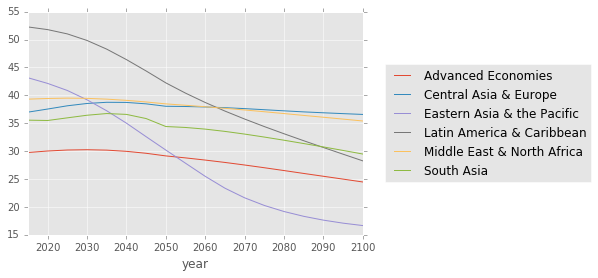

SSP2


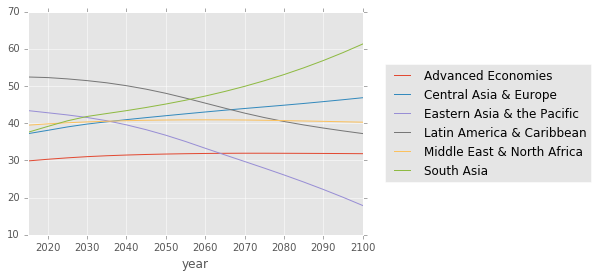

SSP3


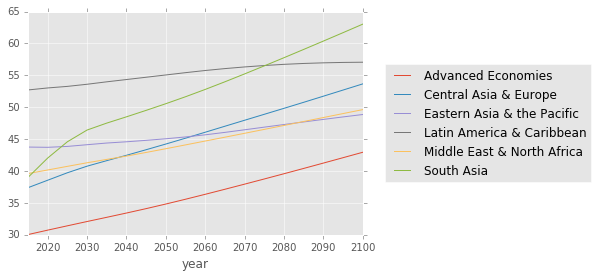

SSP4


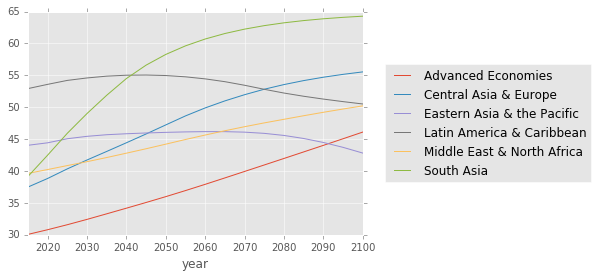

SSP5


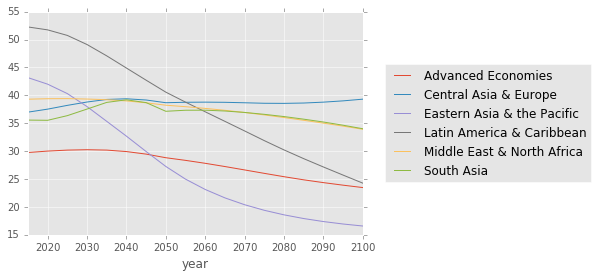

In [3]:
proj = proj.reset_index().set_index(['scenario', 'year', 'Region', 'iso'])
scenarios = set(proj.index.levels[0])
for scenario in sorted(scenarios):
    df = proj.loc[scenario]
    print(scenario)
    df.groupby(level=['Region', 'year']).mean()['gini'].unstack().T.plot()
    plt.legend(loc='right', bbox_to_anchor=(1.7, 0.5))
    plt.show()

# Population-Weighted Gini by Region

In [4]:
# set up data by weighting ginis by sum of regional population for a given year and scenario
regpop = proj.groupby(level=['scenario', 'year', 'Region']).sum()['pop']
df = proj.unstack('iso')
proj['gini_weighted_reg'] = (df['gini'] * df['pop']).div(regpop, axis=0).stack().reorder_levels(proj.index.names)

SSP1


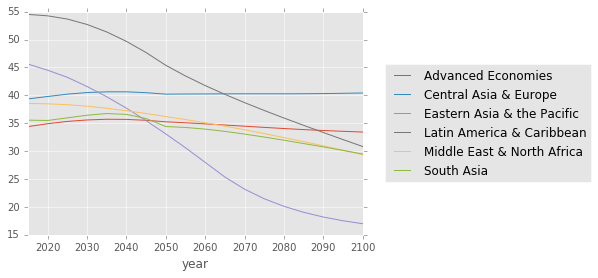

SSP2


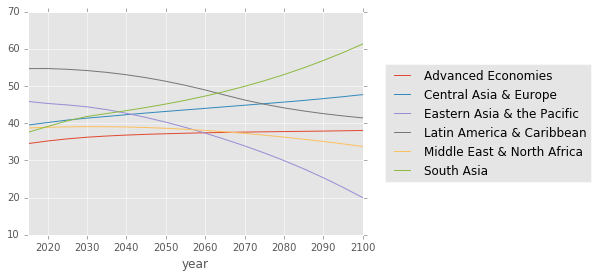

SSP3


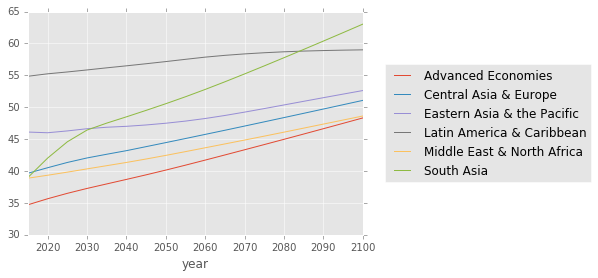

SSP4


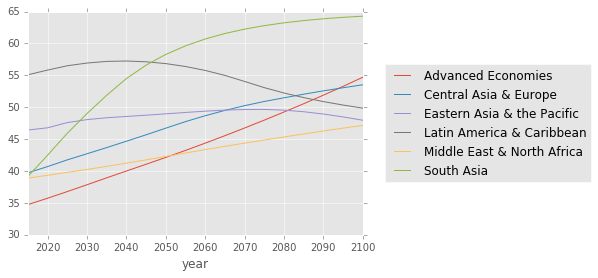

SSP5


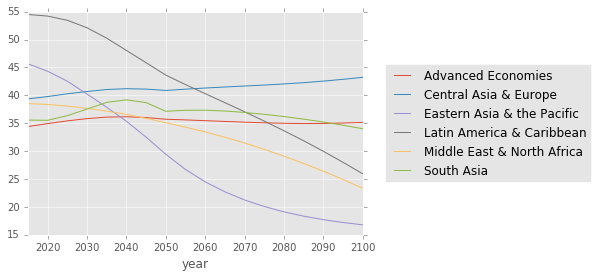

In [5]:
scenarios = set(proj.index.levels[0])
for scenario in sorted(scenarios):
    df = proj.loc[scenario]
    print(scenario)
    df.groupby(level=['Region', 'year']).sum()['gini_weighted_reg'].unstack().T.plot()
    plt.legend(loc='right', bbox_to_anchor=(1.7, 0.5))
    plt.show()